In [1]:
from subprocess import check_call
import matplotlib.pyplot as plt
import os
import time

In [5]:
DEVNULL = open(os.devnull, 'wb', 0)

times_super = []
times_simple = []

sizes = [1, 64, 128, 192, 256, 320, 384, 448, 512, 576, 640, 704, 768, 832, 896, 960, 1024]

In [11]:
for size in sizes:
    input_file = f"../../../input/increasing-size/{size}Mio"

    start_super_time = time.time()
    cmd = f"../../../target/release/super_word_counter {input_file}".split(" ")
    check_call(cmd, stdout=DEVNULL, stderr=DEVNULL)

    time_super = time.time() - start_super_time
    times_super.append(time_super)
    print(f"Super Word Counter {time_super}")

    start_simple_time = time.time()
    cmd = f"../../../../simple_word_counter/target/release/simple_word_counter {input_file}".split(" ")
    check_call(cmd, stdout=DEVNULL, stderr=DEVNULL)

    time_simple = time.time() - start_simple_time
    times_simple.append(time_simple)
    print(f"Simple Word Counter {time_simple}")

Super Word Counter 0.020537137985229492
Simple Word Counter 0.015302181243896484
Super Word Counter 0.2471168041229248
Simple Word Counter 0.765404462814331
Super Word Counter 0.46194028854370117
Simple Word Counter 1.5915768146514893
Super Word Counter 0.6906828880310059
Simple Word Counter 2.017076015472412
Super Word Counter 0.8922314643859863
Simple Word Counter 2.6624033451080322
Super Word Counter 1.2368106842041016
Simple Word Counter 3.2963452339172363
Super Word Counter 1.3449764251708984
Simple Word Counter 3.9880027770996094
Super Word Counter 1.541776418685913
Simple Word Counter 4.606231927871704
Super Word Counter 1.7874064445495605
Simple Word Counter 5.2834696769714355
Super Word Counter 2.1771037578582764
Simple Word Counter 7.355968475341797
Super Word Counter 2.285391092300415
Simple Word Counter 7.419988393783569
Super Word Counter 2.9758331775665283
Simple Word Counter 8.016082286834717
Super Word Counter 2.655083179473877
Simple Word Counter 8.996496200561523
Supe

In [32]:
ticks = [1]
for i, size in enumerate(sizes):
    if i % 2 == 0:
        ticks.append(size)

/tmp/ipykernel_34588/3326259741.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)


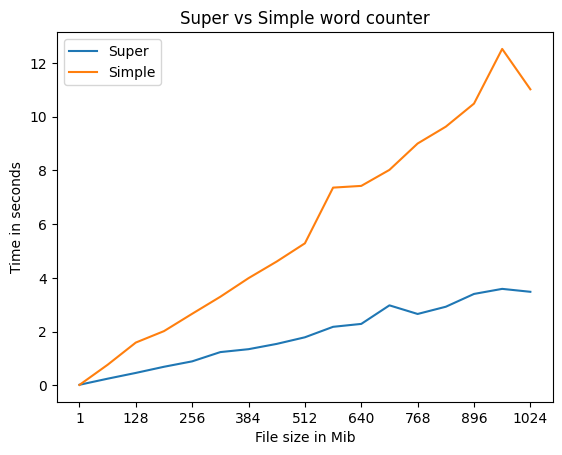

In [44]:
ax = plt.axes()
ax.plot(times_super)
ax.plot(times_simple)
ax.set_xticklabels(ticks)
ax.set_title("Super vs Simple word counter")
ax.set_xlabel("File size in Mib")
ax.set_ylabel("Time in seconds")
ax.legend(["Super", "Simple"])
plt.savefig(f"super_vs_simple_word_counter.png-[{sizes[0]}-{sizes[-1]}]Mib.svg")